In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})


In [22]:
dataset=pd.read_csv('outlier_handled')
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_power_consumed
0,2006-12-16,1209.176,50.212,341733.055,5180.8,14680.933333
1,2006-12-17,2985.470,226.006,345725.320,12375.6,36946.666667
2,2006-12-18,2203.826,161.792,347373.640,9247.2,19028.433333
3,2006-12-19,1666.194,150.942,348479.010,7094.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.610,9313.0,20384.800000


- dropping date and Time features because we spilitted the Date feature

In [23]:
dataset.drop(['Date'],inplace=True,axis=1)

In [24]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_power_consumed
0,1209.176,50.212,341733.055,5180.8,14680.933333
1,2985.470,226.006,345725.320,12375.6,36946.666667
2,2203.826,161.792,347373.640,9247.2,19028.433333
3,1666.194,150.942,348479.010,7094.0,13131.900000
4,2225.748,160.998,348923.610,9313.0,20384.800000


In [25]:
df1=dataset.copy()

In [26]:
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_power_consumed
0,1209.176,50.212,341733.055,5180.8,14680.933333
1,2985.470,226.006,345725.320,12375.6,36946.666667
2,2203.826,161.792,347373.640,9247.2,19028.433333
3,1666.194,150.942,348479.010,7094.0,13131.900000
4,2225.748,160.998,348923.610,9313.0,20384.800000


### checking for the normal distribution

In [27]:
from scipy import stats

In [28]:
def qq_plot(col):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df1[col])
    plt.title(f'{col} pdf')
    plt.subplot(122)
    stats.probplot(df1[col],dist="norm", plot=plt)
    plt.title(f'{col} QQ plot')
    plt.show()

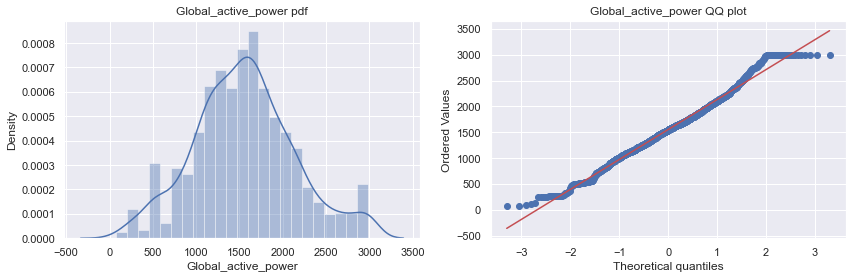

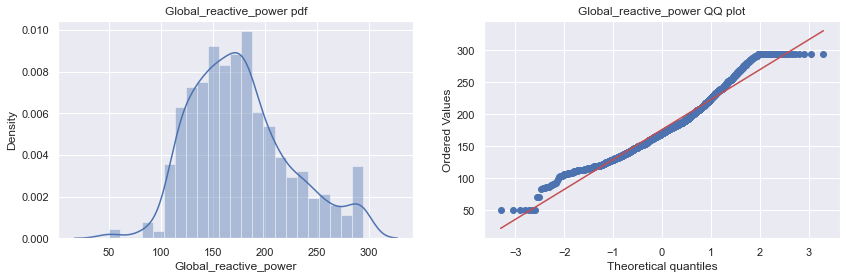

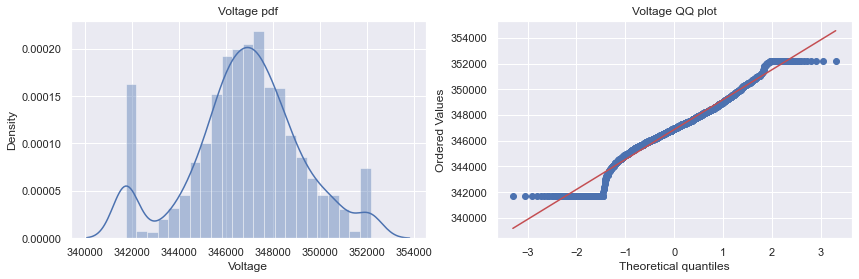

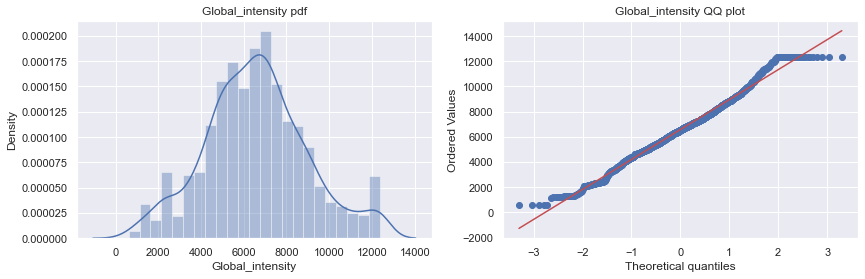

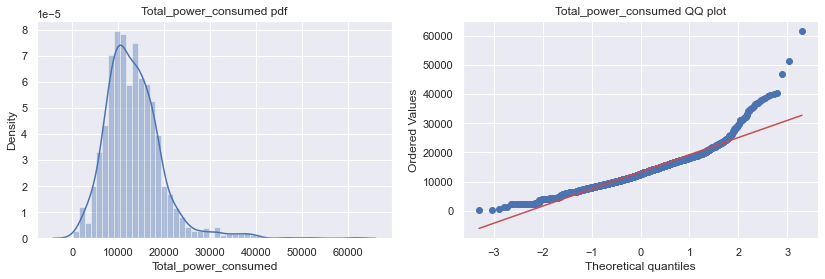

In [29]:
for feature in df1.columns:
    qq_plot(feature)

### Checking for normal distributions before and after transformations

In [30]:
df2=df1.copy()
def plots(df1,col,transformed):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df1[col])
    plt.title('Before transformation')
    plt.subplot(122)
    sns.kdeplot(transformed)
    plt.title('After transformation')
    plt.show()
    

#### Applying log transformation

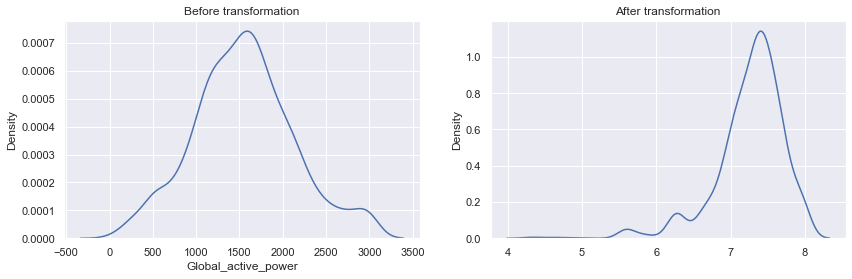

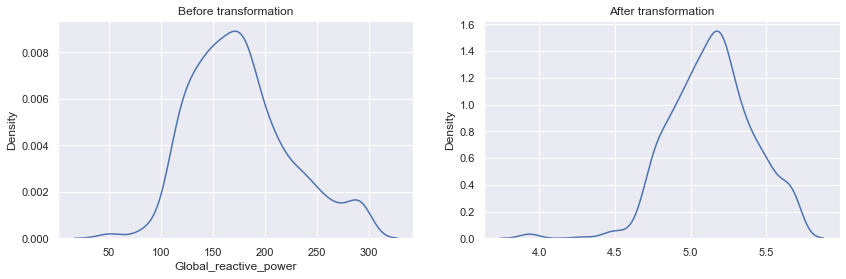

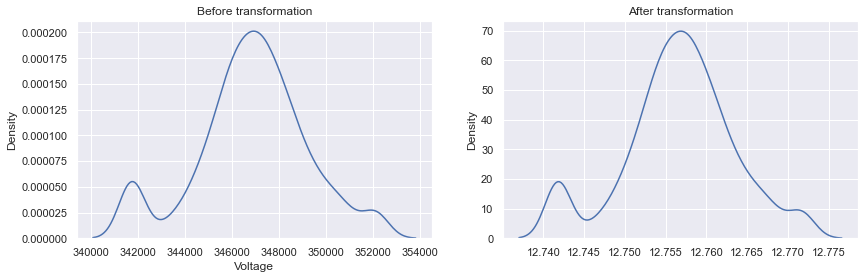

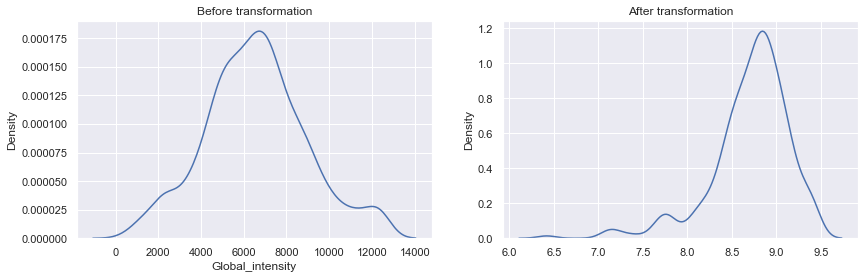

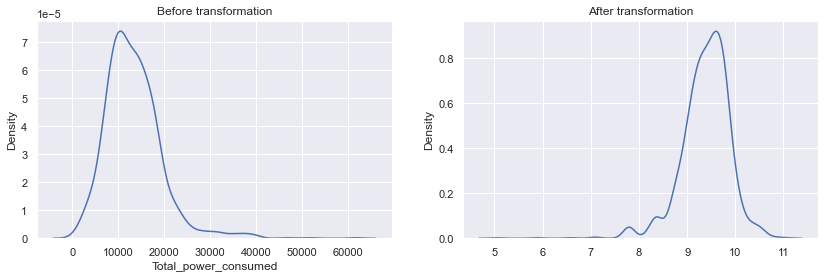

In [31]:
log_transformer = FunctionTransformer(np.log1p)
for col in df2.columns:
    X=np.array(df2[col])
    transformed = log_transformer.transform(X)
    plots(df1,col,transformed)

### Applying yeo johnson transfomer

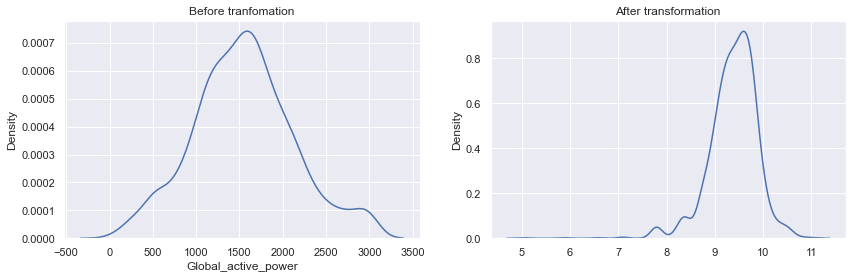

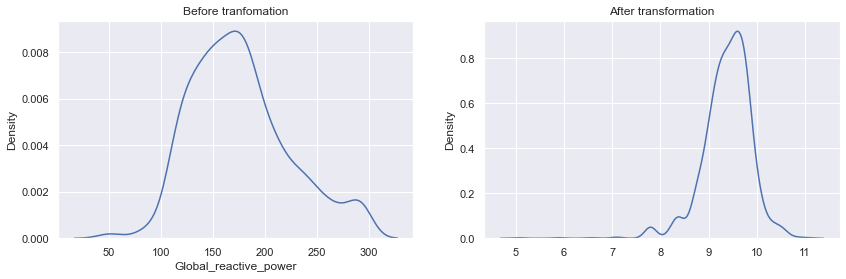

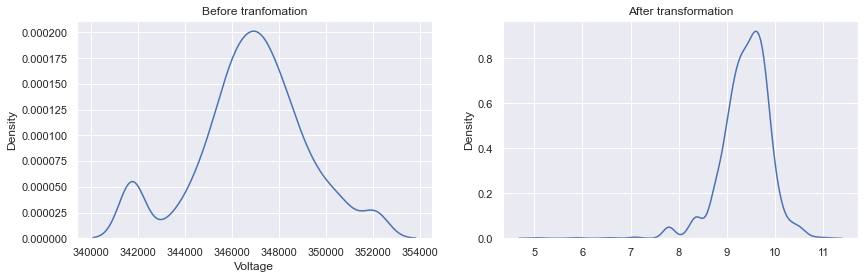

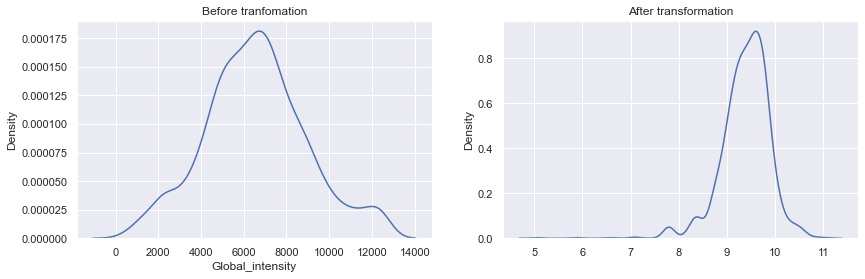

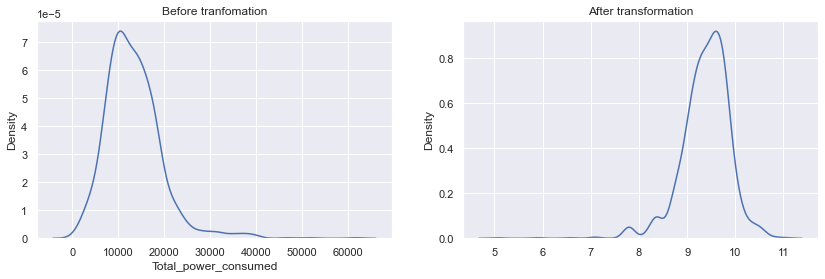

In [32]:
def power_plots(df1,col,t):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df1[col])
    plt.title('Before tranfomation')
    plt.subplot(122)
    transfomed=t.fit_transform(df1[[col]]+0.0000001).flatten()
    sns.kdeplot(transformed)
    plt.title('After transformation')
    plt.show()
    
for feature in df1.columns:
    power_plots(df1,feature,PowerTransformer())

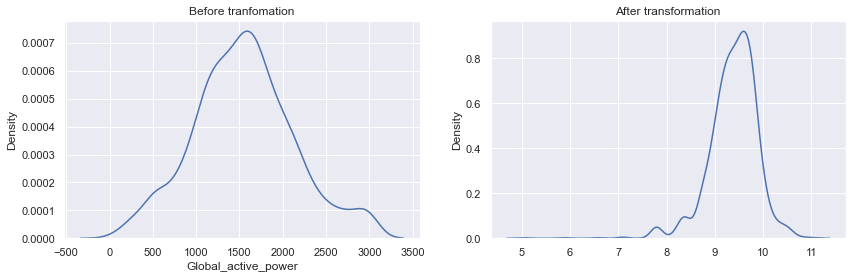

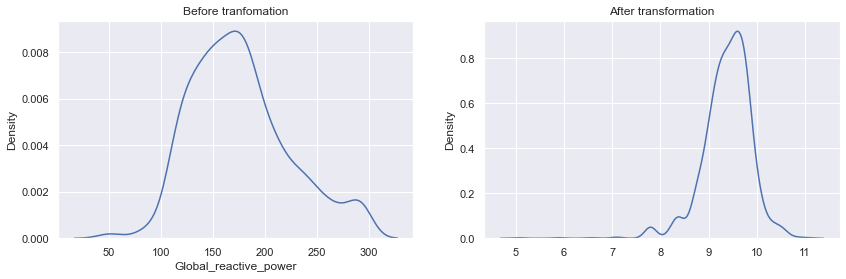

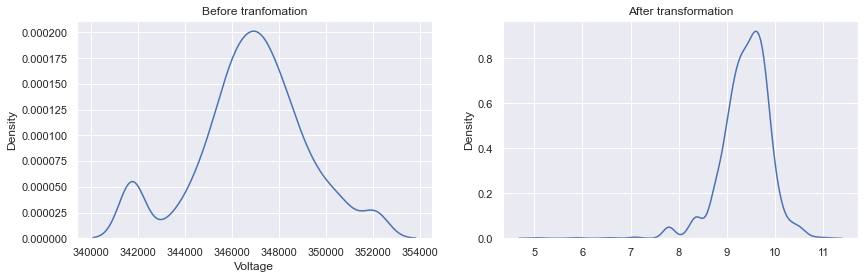

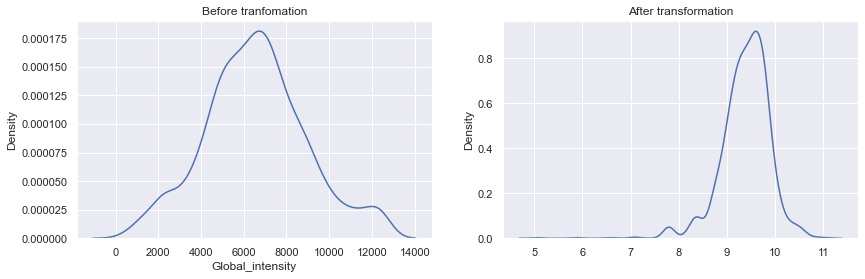

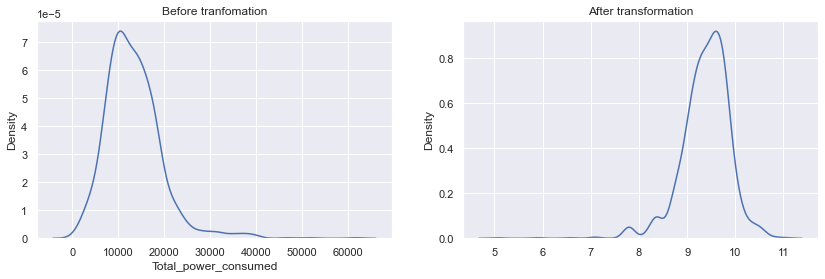

In [33]:
for feature in df1.columns:
    power_plots(df1,feature,PowerTransformer(method='box-cox'))

 -  Observations
    - No transformation is required as data is nearly normally distributed